In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [29]:
start_date = '2024-07-01'
end_date = '2026-01-02'
tickers = {
    '9988.HK': 'Alibaba',
    '0700.HK': 'Tencent',
    '1810.HK': 'Xiaomi',
    '0981.HK': 'SMIC',
    '1024.HK': 'Kuaishou',
    '9868.HK': 'XPeng',
    '9888.HK': 'Baidu',
    '^HSI': 'HSI',
    '3032.HK': 'HSTECH'
}

price_df = yf.download(list(tickers.keys()), start_date, end_date)

/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_80544/3208374374.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price_df = yf.download(list(tickers.keys()), start_date, end_date)
[*********************100%***********************]  9 of 9 completed


In [30]:
indexed_df = price_df['Close'] / price_df['Close'].iloc[0]
indexed_df.rename(columns=tickers, inplace=True)
indexed_df

Ticker,Tencent,SMIC,Kuaishou,Xiaomi,HSTECH,XPeng,Baidu,Alibaba,HSI
Date,,,,,,,,,
2024-07-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2024-07-03,1.027627,1.028136,1.028478,1.014406,1.020928,1.008375,1.027414,1.024840,1.011786
2024-07-04,1.035753,1.024619,0.981380,1.010804,1.023756,1.050251,1.040524,1.038325,1.014584
2024-07-05,1.028711,1.015240,0.980285,0.997599,1.012443,1.018425,1.029797,1.034776,1.001715
2024-07-08,1.025460,1.022274,1.002191,0.987995,1.015271,0.993300,1.029797,1.019163,0.986208
...,...,...,...,...,...,...,...,...,...
2025-12-23,1.644786,4.038687,1.418910,2.352941,1.545532,2.561139,1.427890,2.093831,1.450500
2025-12-24,1.646152,4.158851,1.424422,2.352941,1.546946,2.556114,1.427890,2.078185,1.453021
2025-12-29,1.629759,4.076788,1.406782,2.315726,1.545532,2.648241,1.419547,2.038356,1.442683


<Axes: xlabel='Date'>

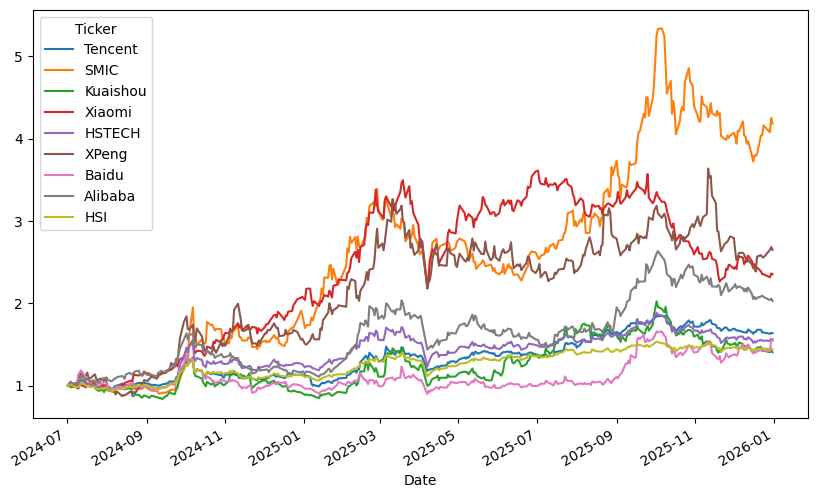

In [35]:
indexed_df.plot(figsize=(10, 6))

In [ ]:
# 3. 下载数据
print("正在下载数据...")
data = yf.download(list(tickers.keys()), start=start_date, end=end_date)['Close']
data.rename(columns=tickers, inplace=True)

/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_80544/3285311528.py:42: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_80544/3285311528.py:42: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_80544/3285311528.py:42: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_80544/3285311528.py:42: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_80544/3285311528.py:42: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/y9/2slp

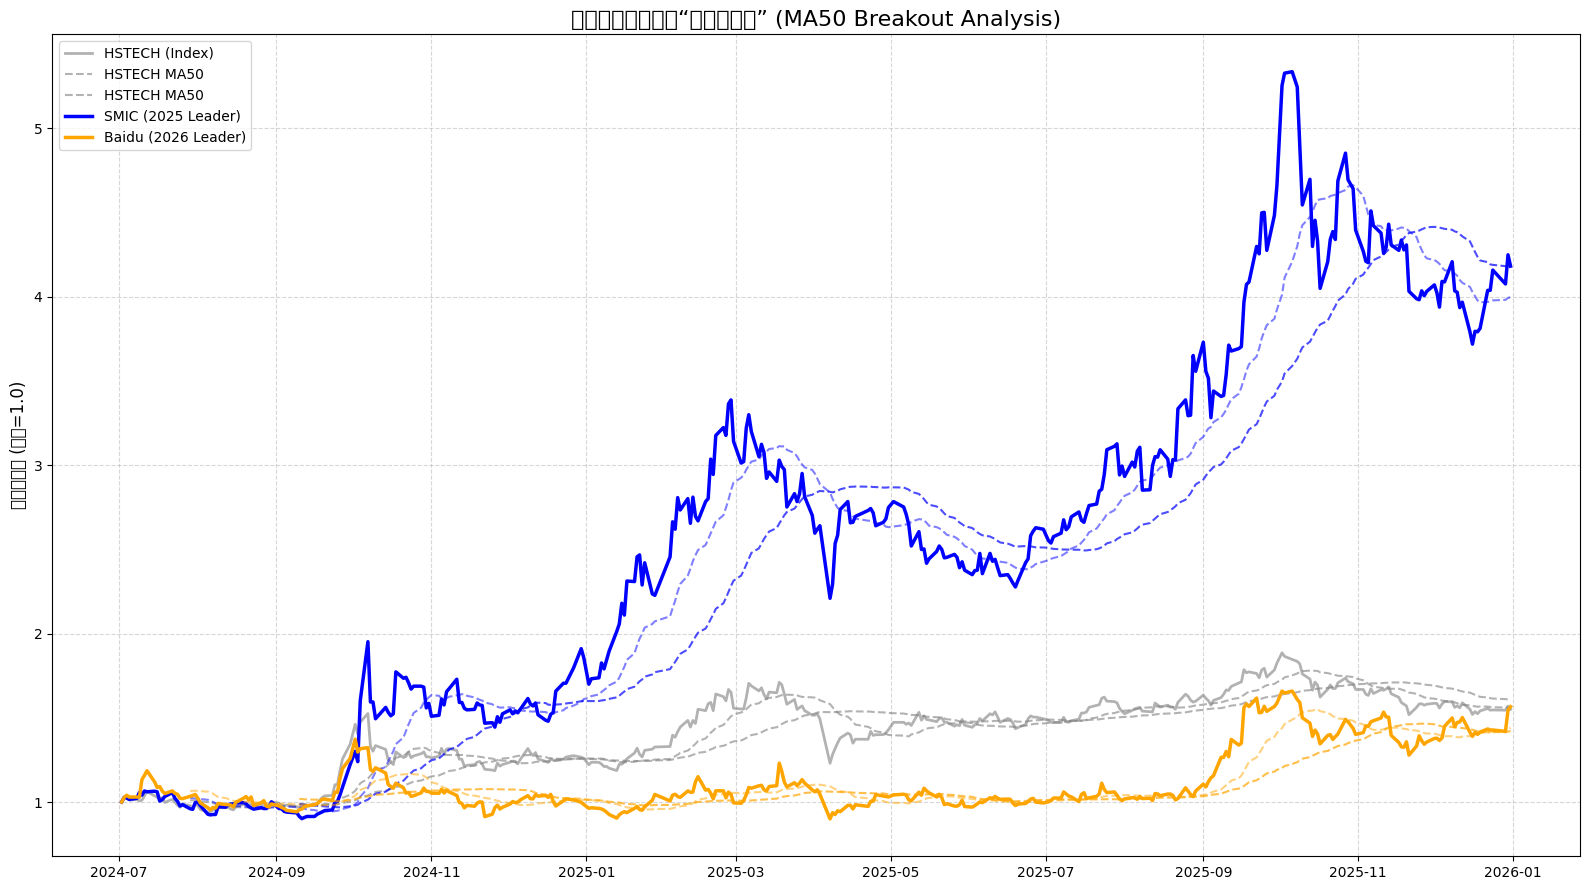

In [38]:
# 4. 关键步骤：计算 50 日均线 (MA50)
# 文档核心逻辑：50日均线是判断中线走强的最重要指标
ma50 = data.rolling(window=50).mean()
ma20 = data.rolling(window=20).mean()


# 5. 数据归一化 (以起始点为基准，方便对比涨幅)
normalized_price = data / data.iloc[0]

# 6. 绘图：揭示“时间差”奥妙
plt.figure(figsize=(16, 9))

# --- 绘制指数 (作为背景参考) ---
# 指数用粗实线
plt.plot(normalized_price.index, normalized_price['HSTECH'], label='HSTECH (Index)', color='gray', linewidth=2, alpha=0.6)
# 指数的 MA50 (虚线) - 观察指数什么时候站上这条线
plt.plot(ma50.index, ma50['HSTECH'] / data['HSTECH'].iloc[0], label='HSTECH MA50', color='gray', linestyle='--', alpha=0.6)
plt.plot(ma20.index, ma20['HSTECH'] / data['HSTECH'].iloc[0], label='HSTECH MA50', color='gray', linestyle='--', alpha=0.6)


# --- 绘制龙头股 (重点观察对象) ---
# 1. 中芯国际 (2025龙头) - 蓝色
plt.plot(normalized_price.index, normalized_price['SMIC'], label='SMIC (2025 Leader)', color='blue', linewidth=2.5)
# 中芯的 MA50
plt.plot(ma50.index, ma50['SMIC'] / data['SMIC'].iloc[0], color='blue', linestyle='--', alpha=0.7)
plt.plot(ma20.index, ma20['SMIC'] / data['SMIC'].iloc[0], color='blue', linestyle='--', alpha=0.5)

# 2. 百度 (2026龙头) - 橙色
plt.plot(normalized_price.index, normalized_price['Baidu'], label='Baidu (2026 Leader)', color='orange', linewidth=2.5)
# 百度的 MA50
plt.plot(ma50.index, ma50['Baidu'] / data['Baidu'].iloc[0], color='orange', linestyle='--', alpha=0.7)
plt.plot(ma20.index, ma20['Baidu'] / data['Baidu'].iloc[0], color='orange', linestyle='--', alpha=0.5)

# --- 标注“奥妙”区域 ---
# 这里的绿色区域就是文档说的“时间差”：龙头股已经站上均线起飞，而指数还在均线下方
plt.title('领涨龙头与指数的“均线时间差” (MA50 Breakout Analysis)', fontsize=16)
plt.ylabel('归一化价格 (起点=1.0)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

# 7. 显示图表
plt.tight_layout()
plt.show()